[Ref](#slow_part) to the part that runs kinda slow

## Analyzing Real Stock Market Data to Predict Buy or Sell

An analysis of the Walmart (WMT) stock over time in an attempt to predict whether to buy or sell the stock at a certain point in time

We'll start by importing all of the libraries relevant to this project

In [1]:
#for the math and data handling
import numpy as np
import pandas as pd

#for graphing
import matplotlib.pyplot as plt
%matplotlib inline

#for training a neural network
import tensorflow as tf

#for dates (was not used in this program, but could be useful)
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Load in the Data

This data was downloaded from yahoo finance, under the historical data tab for the stock. I was surprised, but this did seem to be one of the best sources for the data. [Walmart's](https://finance.yahoo.com/quote/WMT/history?p=WMT) [S&P 500's](https://finance.yahoo.com/quote/SPY/history?p=SPY). From here, the data range can be selected (I chose max), and then the data can be downloaded as a csv

Also note, I converted the date column from a string into a datetime object.

In [2]:
spdr = pd.read_csv("./spy.csv")
spdr["Date"] = pd.to_datetime(spdr["Date"])
print(len(spdr))
spdr.tail()

6785


,Date,Open,High,Low,Close,Adj Close,Volume
6780,2020-01-02,323.540009,324.890015,322.529999,324.869995,324.869995,59151200
6781,2020-01-03,321.160004,323.640015,321.100006,322.410004,322.410004,77709700
6782,2020-01-06,320.489990,323.730011,320.359985,323.640015,323.640015,55653900
6783,2020-01-07,323.019989,323.540009,322.239990,322.730011,322.730011,40496400
6784,2020-01-08,322.940002,325.779999,322.670013,324.450012,324.450012,68296000


In [3]:
wmt = pd.read_csv("./wmt.csv")
wmt["Date"] = pd.to_datetime(wmt["Date"])
print(len(wmt))
wmt.tail()

11946


,Date,Open,High,Low,Close,Adj Close,Volume
11941,2020-01-02,118.860001,119.889999,118.699997,118.940002,118.940002,6764900
11942,2020-01-03,118.269997,118.790001,117.589996,117.889999,117.889999,5399200
11943,2020-01-06,117.400002,118.089996,116.769997,117.650002,117.650002,6445500
11944,2020-01-07,117.260002,117.519997,116.199997,116.559998,116.559998,6846900
11945,2020-01-08,116.300003,116.730003,115.680000,116.160004,116.160004,5875800


As you can see, somehow Walmart has more data points, so I'm going to use them for the mere sake of more training data

Before performing any data science, it's always good to just look at what data you have available. For this, we can see that we have the date, the opening/closing prices, the high/low prices, the adjusted close price, and the volume of transactions. For this project, we'll use the high and low to properly capture all of the possible prices, and then the opening price, to assume we're only trading at the start of the day.

To see the trends of the data themselves, we'll plot both

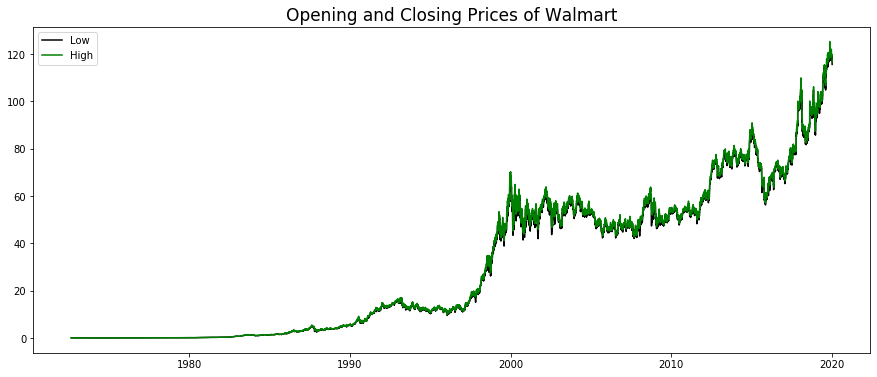

In [4]:
plt.figure(figsize=(15,6))
plt.plot(wmt["Date"], wmt["Low"], color="k", label="Low")
plt.plot(wmt["Date"], wmt["High"], color="g", label="High")
plt.title("Opening and Closing Prices of Walmart", fontsize=17)
plt.legend();

Then, I messed around with methods for taking subslices of the data

This is time based:

In [5]:
start = np.datetime64('2019-01-24')
end = start + np.timedelta64(30, 'D')
slice = wmt[(wmt["Date"] >= start) & (wmt["Date"] < end)]
print(len(slice)) #missing weekends
slice.head()

21


,Date,Open,High,Low,Close,Adj Close,Volume
11704,2019-01-24,98.199997,98.459999,96.430000,98.360001,96.407509,7609700
11705,2019-01-25,98.750000,98.910004,96.750000,96.940002,95.015694,7218200
11706,2019-01-28,96.529999,97.070000,96.080002,97.059998,95.133308,5875800
11707,2019-01-29,96.769997,97.160004,96.510002,96.709999,94.790260,5253400
11708,2019-01-30,96.680000,96.800003,94.260002,94.800003,92.918182,11849300


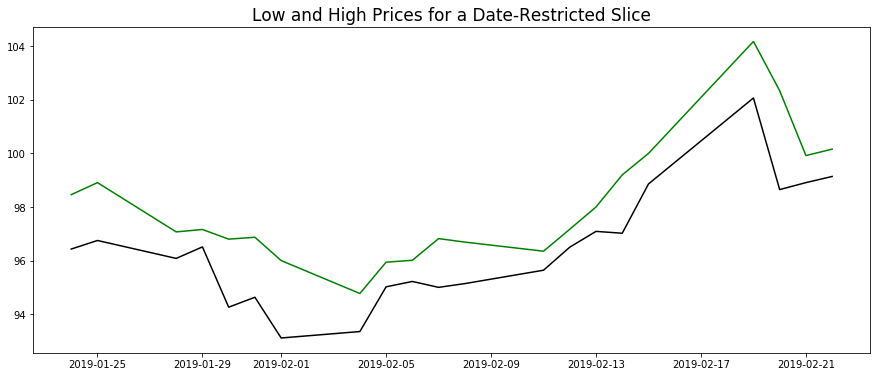

In [6]:
plt.figure(figsize=(15,6))
plt.plot(slice["Date"], slice["Low"], color="k")
plt.plot(slice["Date"], slice["High"], color="g")
plt.title("Low and High Prices for a Date-Restricted Slice", fontsize=17);

And this is index based:

In [7]:
spot = np.random.random() * (len(wmt) - 100)
slice2 = wmt.loc[spot : spot +30].copy()
print(len(slice2))
slice2

30


,Date,Open,High,Low,Close,Adj Close,Volume
9045,2008-07-01,56.000000,57.070000,55.610001,57.029999,43.185947,22714900
9046,2008-07-02,57.250000,57.799999,56.450001,56.500000,42.784615,20767500
9047,2008-07-03,56.860001,57.570000,56.029999,56.599998,42.860340,11793600
9048,2008-07-07,56.750000,57.869999,56.200001,56.910000,43.095097,22230900
9049,2008-07-08,57.169998,59.290001,56.910000,59.110001,44.761040,32714300
9050,2008-07-09,59.290001,59.290001,57.599998,57.669998,43.670597,25496700
9051,2008-07-10,58.049999,58.139999,56.070000,57.209999,43.322254,29887300
9052,2008-07-11,56.680000,57.340000,55.639999,56.290001,42.625595,27891700
9053,2008-07-14,57.000000,57.130001,55.980000,56.310001,42.640739,21049600
9054,2008-07-15,55.980000,56.799999,55.340000,56.240002,42.587734,26589600


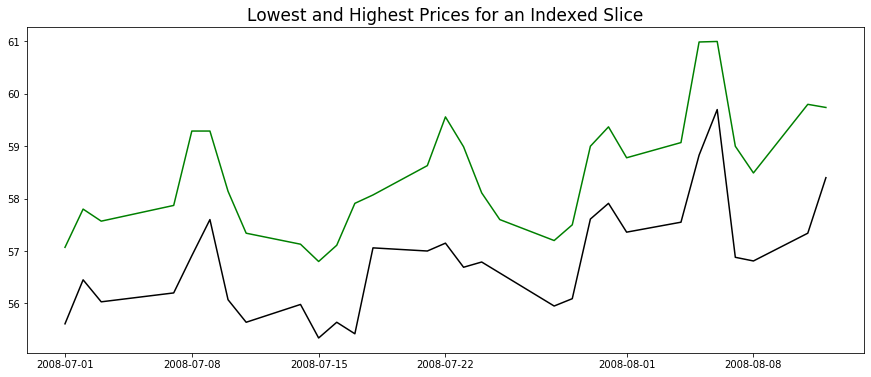

In [8]:
plt.figure(figsize=(15,6))
plt.plot(slice2["Date"], slice2["Low"], color="k")
plt.plot(slice2["Date"], slice2["High"], color="g")
plt.title("Lowest and Highest Prices for an Indexed Slice", fontsize=17);

### The Plan

Try to predict whether we should buy or sell walmart stock based on past stock prices

I have two programs I am interested in creating:

#### Program 1: Buy or Sell

The predictor will be a deep neural network with a yet undecided input size and two outputs, one to buy and one to sell

The resulting answer of whether to buy or sell will be algorithmically generated from the future prices. It will compare the current price to a compilation of ranges in the future
- Next week: the daily ranges for the next 7 days
- Two Weeks: the 2 day range for 8-9, 10-11, 12-13, and 14-15 days ahead
- Month: the 5 day range 15, 20, 25, 30, and 35 days ahead
- Far Future: two 15 day ranges from 40 to 54 and 55 to 69 days ahead

For each one of these, if the current price (opening price) is outside the range it will increase the likelihood of one of the outputs. The further outside of the range, the more it increases it. Current value being above the range increases the sell likelihood, current value being below the range increases the buy likelihood

The meaning of the values is as follows:

<table>
    <tr>
        <th></th>
        <th>
            Large Buy
        </th>
        <th>
            Small Buy
        </th>
    </tr>
    <tr>
        <th>
            Large Sell
        </th>
        <td>
            Volatile
        </td>
        <td>
            Sell
        </td>
    </tr>
    <tr>
        <th>
            Small Sell
        </th>
        <td>
            Buy
        </td>
        <td>
            Steady
        </td>
    </tr>
</table>

#### Program 2: Future Graph

This predictor will be a deep neural network with an undecided input size and an undecided output size. The input will be the past data and the output will be the predicted future prices at several points in time. It would then be possible to decide when to buy the stock, and when it would be best to sell

----

I think it would be more interesting to deal with program 1, the buy/sell

It would be super cool to plot a colored graph of the decision, as well as making the decision a lot simpler. That way I wouldn't have to rely as much on my own decisions based on a possibly wrong graph, and could purely optimize for a machine's vision of the future

### Creating Future Groups

So, I'll start by creating a new dataframe with all of the future bounds

Remember, we're making bounds for:

Next week
- 1 day
- 2 days
- 3 days
- 4 days
- 5 days
- 6 days
- 7 days

Two Weeks
- 8,9
- 10,11
- 12,13
- 14,15

Month
- 16,17,18,19
- 20,21,22,23,24
- 25,26,27,28,29
- 30,31,32,33,34
- 35,36,37,38,39

Far Future
- 40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
- 55,56,57,58,59,60,61,62,63,64,65,66,67,68,69

I decided to work with business days only, since it would be difficult to extrapolate data for the weekend values and would potentially even be wrong.

In [9]:
groups = {}
group_names = ["one", "two", "three", "four", "five", "six", "seven",
               "eight", "ten", "twelve", "fourteen",
               "sixteen", "twenty", "twenty_five", "thirty", "thirty_five",
               "forty", "fifty_five"]
group_components = [[1], [2], [3], [4], [5], [6], [7],
                    [8,9], [10,11], [12,13], [14,15],
                    [16,17,18,19], [20,21,22,23,24], [25,26,27,28,29], [30,31,32,33,34], [35,36,37,38,39],
                    [40,41,42,43,44,45,46,47,48,49,50,51,52,53,54],[55,56,57,58,59,60,61,62,63,64,65,66,67,68,69]]

for i in range(len(group_names)):
    groups[group_names[i]] = np.array(group_components[i])

groups

{'one': array([1]),
 'two': array([2]),
 'three': array([3]),
 'four': array([4]),
 'five': array([5]),
 'six': array([6]),
 'seven': array([7]),
 'eight': array([8, 9]),
 'ten': array([10, 11]),
 'twelve': array([12, 13]),
 'fourteen': array([14, 15]),
 'sixteen': array([16, 17, 18, 19]),
 'twenty': array([20, 21, 22, 23, 24]),
 'twenty_five': array([25, 26, 27, 28, 29]),
 'thirty': array([30, 31, 32, 33, 34]),
 'thirty_five': array([35, 36, 37, 38, 39]),
 'forty': array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]),
 'fifty_five': array([55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])}

Just in case, we can sum up all of the groups to check if we're missing any date by accident

In [10]:
sum = 0
for group in groups:
    sum += np.sum(groups[group])

print("Missing numbers sum to:", np.sum(range(70)) - sum)

Missing numbers sum to: 0


Next, we can create a column for the future values. Since we're going 70 days into the future, we'll also have to cut back our dataframe by 70 days, since those won't have complete data

In [11]:
maxDate = len(wmt) - 70
dfPredictor = wmt.loc[:maxDate].copy()
dfPredictor.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
11872,2019-09-24,118.250000,119.860001,118.010002,118.400002,117.871300,7273100
11873,2019-09-25,118.470001,118.720001,117.809998,118.470001,117.940987,4613600
11874,2019-09-26,118.800003,119.550003,118.190002,118.300003,117.771744,3986900
11875,2019-09-27,119.209999,119.230003,117.750000,118.449997,117.921074,3434700
11876,2019-09-30,118.669998,119.440002,118.559998,118.680000,118.150047,3401400


Next, we'll put the future values into the dataframe. (This part runs super slowly. I've been able to make small improvements, but there may still be an issue. It does seem to give the correct answer though)<a id="slow_part"></a>

Again, what this is doing is going through the date range for each group and finding the highest and lowest values from those ranges

In [12]:
for group in groups:
    #low
    group_name = "Low_" + group
    print(group_name)
    #create the column
    dfPredictor[group_name] = 0.0
    #make this group an np array (quicker)
    low = np.array(wmt["Low"])
    #use list comprehension to set the values
    dfPredictor[group_name] = [np.min(low[ndx + groups[group]])   for ndx in range(len(dfPredictor)) ]

    #high
    group_name = "High_" + group
    print(group_name)
    #create the column
    dfPredictor[group_name] = 0.0
    #make this group an np array (quicker)
    high = np.array(wmt["High"])
    #use list comprehension to set the values
    dfPredictor[group_name] = [np.min(high[ndx + groups[group]])   for ndx in range(len(dfPredictor)) ]

Low_one
High_one
Low_two
High_two
Low_three
High_three
Low_four
High_four
Low_five
High_five
Low_six
High_six
Low_seven
High_seven
Low_eight
High_eight
Low_ten
High_ten
Low_twelve
High_twelve
Low_fourteen
High_fourteen
Low_sixteen
High_sixteen
Low_twenty
High_twenty
Low_twenty_five
High_twenty_five
Low_thirty
High_thirty
Low_thirty_five
High_thirty_five
Low_forty
High_forty
Low_fifty_five
High_fifty_five


In [13]:
dfPredictor.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Low_one,High_one,Low_two,...,Low_twenty_five,High_twenty_five,Low_thirty,High_thirty,Low_thirty_five,High_thirty_five,Low_forty,High_forty,Low_fifty_five,High_fifty_five
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.037636,2508800,0.064209,0.064941,0.063477,...,0.057373,0.059570,0.058105,0.058350,0.056396,0.058105,0.060547,0.061035,0.062744,0.062988
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.037493,972800,0.063477,0.063965,0.062988,...,0.057617,0.058594,0.056885,0.058105,0.056396,0.058105,0.060547,0.061035,0.062744,0.062988
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.037065,1945600,0.062988,0.063477,0.062500,...,0.057617,0.058594,0.056396,0.058105,0.058350,0.061768,0.060547,0.061035,0.062744,0.062988
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.037065,409600,0.062500,0.062988,0.062744,...,0.057617,0.058594,0.056396,0.058105,0.060547,0.061279,0.060791,0.061035,0.062744,0.062988
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.036495,870400,0.062744,0.062988,0.062500,...,0.057617,0.058594,0.056396,0.058105,0.060547,0.061035,0.060791,0.061279,0.062744,0.062988


### Creating Buy/Sell Columns

We'll now create a column for our buy and sell predictions. Since we widened our bounds further in the future, we've already accounted for a large variability in the future. So, we should just be able to weight all of them equally. 

Again, if the current value is below the range, we are increasing the gain value. If the current value is above the range, we are increasing the sell value. The amount we increase them by will be the change from the current value to the middle of the range. This is since the middle of the range acts as our expected value, and the highs and lows act as our confidence bounds. We have to be confident that it will change by a lot to count it, but the actual value of change is dependent on what we expect it to be.

Then, we'll divide it by the current value so that they are relative differences and actual price point doesn't matter.

So,

$
\Delta Gain = (\text{current value} < \text{lower}) \,?\, (\text{middle} - \text{current value}) : 0 
$

$
\Delta Loss = (\text{current value} > \text{upper}) \,?\, (\text{current value} - \text{middle}) : 0 
$

$
Buy = \sum_{ranges} \Delta Gain
$

$
Sell = \sum_{ranges} \Delta Loss
$

In [14]:
#how much we're expected to gain and lose
def expected_change(curr, lower, upper):
    middle = np.divide(np.add(lower, upper), 2)
    gain = (middle - curr) if (curr < lower) else 0
    loss = (curr - middle) if (curr > upper) else 0
    return gain, loss

In [15]:
#the buy and sell values for that range
def decision(curr, lower_list, upper_list):
    if( len(lower_list) != len(upper_list) ):
        raise "List not the same length"
    
    buy = 0
    sell = 0
    
    for lower, upper in zip(lower_list, upper_list):
        gain, loss = expected_change(curr, lower, upper)
        buy += gain
        sell += loss
    
    buy /= curr
    sell /= curr
    return buy, sell

In [16]:
#get the group names
def make_low(x):
    return "Low_" + x
def make_high(x):
    return "High_" + x

lows = np.array([make_low(x) for x in group_names])
highs = np.array([make_high(x) for x in group_names])
print(lows)
print(highs)

#collate the columns into lists
dfPredictor["Low_list"] = dfPredictor[lows].values.tolist()
dfPredictor["High_list"] = dfPredictor[highs].values.tolist()
dfPredictor[["Open", "Low_list", "High_list"]].head()

['Low_one' 'Low_two' 'Low_three' 'Low_four' 'Low_five' 'Low_six'
 'Low_seven' 'Low_eight' 'Low_ten' 'Low_twelve' 'Low_fourteen'
 'Low_sixteen' 'Low_twenty' 'Low_twenty_five' 'Low_thirty'
 'Low_thirty_five' 'Low_forty' 'Low_fifty_five']
['High_one' 'High_two' 'High_three' 'High_four' 'High_five' 'High_six'
 'High_seven' 'High_eight' 'High_ten' 'High_twelve' 'High_fourteen'
 'High_sixteen' 'High_twenty' 'High_twenty_five' 'High_thirty'
 'High_thirty_five' 'High_forty' 'High_fifty_five']


,Open,Low_list,High_list
0,0.063477,"[0.064209, 0.06347699999999999, 0.062988, 0.06...","[0.064941, 0.063965, 0.06347699999999999, 0.06..."
1,0.064453,"[0.06347699999999999, 0.062988, 0.0625, 0.0627...","[0.063965, 0.06347699999999999, 0.062988, 0.06..."
2,0.063965,"[0.062988, 0.0625, 0.06274400000000001, 0.0625...","[0.06347699999999999, 0.062988, 0.062988, 0.06..."
3,0.063477,"[0.0625, 0.06274400000000001, 0.0625, 0.062988...","[0.062988, 0.062988, 0.062988, 0.062988, 0.062..."
4,0.062988,"[0.06274400000000001, 0.0625, 0.062988, 0.0627...","[0.062988, 0.062988, 0.062988, 0.062988, 0.062..."


In [17]:
#make the buy and sell columns
dfPredictor["Buy"] = 0.0
dfPredictor["Sell"] = 0.0

for ndx in range(len(dfPredictor)):
    buy, sell = decision(dfPredictor["Open"].iat[ndx], dfPredictor["Low_list"].iat[ndx], dfPredictor["High_list"].iat[ndx])
    dfPredictor["Buy"].iat[ndx] = buy
    dfPredictor["Sell"].iat[ndx] = sell
    
dfPredictor[["Open", "Buy", "Sell", "Low_list", "High_list"]].tail(10)

,Open,Buy,Sell,Low_list,High_list
11867,115.320000,0.395465,0.000000,"[116.18, 116.769997, 116.800003, 116.559998, 1...","[117.230003, 117.809998, 117.639999, 118.41000..."
11868,116.910004,0.161235,0.010435,"[116.769997, 116.800003, 116.559998, 118.01000...","[117.809998, 117.639999, 118.410004, 119.86000..."
11869,117.400002,0.132325,0.014566,"[116.800003, 116.559998, 118.010002, 117.80999...","[117.639999, 118.410004, 119.860001, 118.72000..."
11870,117.349998,0.149851,0.014146,"[116.559998, 118.010002, 117.809998, 118.19000...","[118.410004, 119.860001, 118.720001, 119.55000..."
11871,116.610001,0.270689,0.000000,"[118.010002, 117.809998, 118.190002, 117.75, 1...","[119.860001, 118.720001, 119.550003, 119.23000..."
11872,118.250000,0.033784,0.042960,"[117.809998, 118.190002, 117.75, 118.559998, 1...","[118.720001, 119.550003, 119.230003, 119.44000..."
11873,118.470001,0.029248,0.067148,"[118.190002, 117.75, 118.559998, 117.720001, 1...","[119.550003, 119.230003, 119.440002, 119.11000..."
11874,118.800003,0.012079,0.116078,"[117.75, 118.559998, 117.720001, 115.610001, 1...","[119.230003, 119.440002, 119.110001, 117.55000..."
11875,119.209999,0.000000,0.158334,"[118.559998, 117.720001, 115.610001, 114.58000...","[119.440002, 119.110001, 117.550003, 116.80000..."
11876,118.669998,0.019803,0.095306,"[117.720001, 115.610001, 114.58000200000001, 1...","[119.110001, 117.550003, 116.800003, 118.30000..."


Now that we've have the buy/sell columns, it's good to look at them again to make sure everything makes sense. Here's a plot of the buy/sell to see how they're distributed:

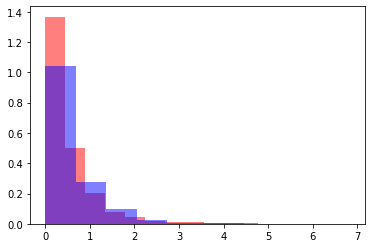

In [18]:
plt.hist(dfPredictor["Sell"].loc[dfPredictor["Sell"] != 0], color='r', alpha=.5, density=True)
plt.hist(dfPredictor["Buy"].loc[dfPredictor["Buy"] != 0], color='b', alpha=.5, density=True);

You can see that they're mostly distributed around 0-1 but also extend all the way out to 8. To make them all within the range of 0 to 1, I'm going to use a version of the softsign function.

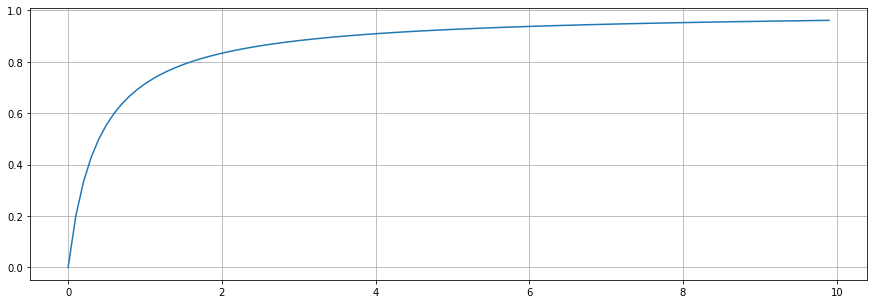

In [19]:
def easysign(x):
    return x / (x+.4)

x = np.arange(0, 10,.1)
plt.figure(figsize=(15,5))
plt.plot(x, easysign(x))
plt.grid();

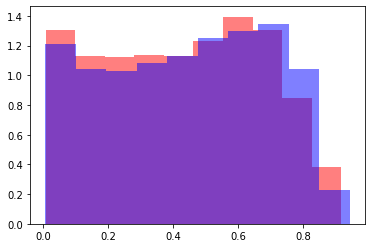

In [20]:
dfPredictor["ScaleBuy"] = dfPredictor["Buy"].apply(easysign)
dfPredictor["ScaleSell"] = dfPredictor["Sell"].apply(easysign)

plt.hist(dfPredictor["ScaleSell"].loc[dfPredictor["Sell"] != 0], color='r', alpha=.5, density=True)
plt.hist(dfPredictor["ScaleBuy"].loc[dfPredictor["Buy"] != 0], color='b', alpha=.5, density=True);

Now we have our data scaled and about uniformly distributed. Interestingly, we can see that 'buy' has a lot more small increases, while 'sell' has a lot more larger decreases. This makes a little sense, as the price steadily rises, and usually falls fairly quickly.

Now that we have the buy and sell columns, I'll graph it to make sure that our metrics for deciding actually are a reasonable measure

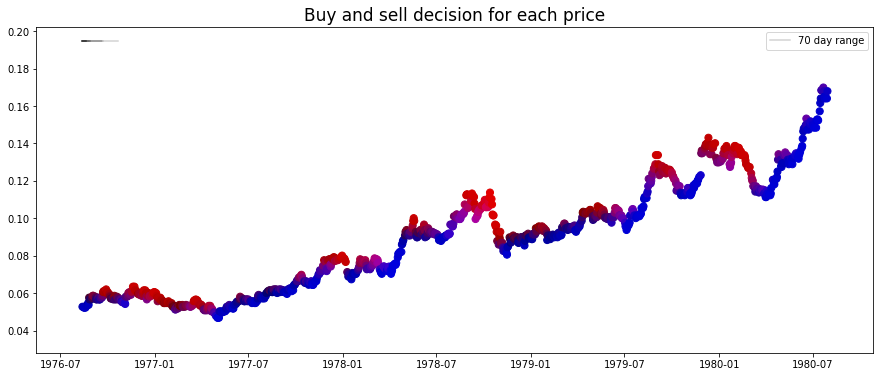

In [21]:
def plot_colored(df):
    plot_colored_lists(df["Date"], df["Open"], df["ScaleBuy"], df["ScaleSell"])

def plot_colored_lists(date_list, price_list, buy_list, sell_list):
    #make the colors
    colors = np.array([(s, 0, b) for b,s in zip(buy_list, sell_list)])
    
    #graph it
    plt.figure(figsize=(15,6))
    plt.scatter(date_list, price_list, color=colors, s=50)
    plt.title("Buy and sell decision for each price", fontsize=17)
    
    #add a scale for reference
    mx = np.max(price_list)
    mn = np.min(price_list)
    above = mx + .2 * (mx - mn)
    mx = np.max(date_list)
    mn = np.min(date_list)
    #1-7, 7-15, 15-44
    plt.plot([mn, mn + np.timedelta64(7, 'D')], [above, above], color='black')
    plt.plot([mn + np.timedelta64(7, 'D'), mn + np.timedelta64(15, 'D')], [above, above], color=(.25,.25,.25))
    plt.plot([mn + np.timedelta64(15, 'D'), mn + np.timedelta64(39, 'D')], [above, above], color='gray')
    plt.plot([mn + np.timedelta64(39, 'D'), mn + np.timedelta64(69, 'D')], [above, above], color='lightgray', label='70 day range')
    plt.legend()

#change spot to see different areas along the graph
spot = 1000
#change this to vary the width of the points being inspected
spot2 = spot + 1000
plot_colored(dfPredictor.iloc[spot:spot2])

Where the colors are as follows:

<table>
    <tr>
        <th></th>
        <th>
            Large Buy
        </th>
        <th></th>
        <th>
            Small Buy
        </th>
    </tr>
    <tr>
        <th>
            Large Sell
        </th>
        <td style="background-color:rgb(255, 0, 255)">
            Volatile
        </td>
        <td style="background-color:rgb(255, 0, 127)"></td>
        <td style="background-color:rgb(255, 0, 0)">
            Sell
        </td>
    </tr>
    <tr>
        <th></th>
        <td style="background-color:rgb(127, 0, 255)"></td>
        <td style="background-color:rgb(127, 0, 127)"></td>
        <td style="background-color:rgb(127, 0, 0)"></td>
    </tr>
    <tr>
        <th>
            Small Sell
        </th>
        <td style="background-color:rgb(0, 0, 255)">
            Buy
        </td>
        <td style="background-color:rgb(0, 0, 127)"></td>
        <td style="background-color:rgb(0, 0, 0); color:white">
            Steady
        </td>
    </tr>
</table>

As we can see from the graph, this function appears to do a good job at representing buy/sell decisions

### The Neural Network

To predict the buy/sell value for each point, I'll be using a convoltional neural network. To help facilitate this, I'll be using Tensorflow

Our desired output will be the values for our buy/sell variables. The inputs will be the past values of the stock. While it would be optimal to pass in all of the past data, it is difficult to pass in variable amounts of data to a nerual network. So, it will have to be a selected range. Since we are going 70 days into the future, I think it would be reasonable to go twice that value back (140 days), which gives the program an insight into the workings of the timescale that we're working on, but also gives it a lot more context.

This will be a convolutional network since we'll be convoluting along the time axis twice. This will ensure that the program takes into account the temporal locality of the data

In [22]:
model = tf.keras.models.Sequential([
    #take in the values and add a dimension for the filters
    tf.keras.layers.InputLayer(input_shape=(140)),
    tf.keras.layers.Reshape((140,1)),
    
    #convolute it 1
    tf.keras.layers.Conv1D(filters=10, kernel_size=9, strides=1, activation='linear'),
    #normalize it
    tf.keras.layers.BatchNormalization(),
    #pool together the data
    tf.keras.layers.MaxPool1D(pool_size=2),
    #dropout 1/4
    tf.keras.layers.Dropout(.25),
    
    #convolute it again 2
    tf.keras.layers.Conv1D(filters=20, kernel_size=9, strides=1, activation='softsign'),
    #normalize it
    tf.keras.layers.BatchNormalization(),
    #pool together the data
    tf.keras.layers.MaxPool1D(pool_size=3),
    #dropout 1/4
    tf.keras.layers.Dropout(.25),
    
    #convolute it again 3
    tf.keras.layers.Conv1D(filters=30, kernel_size=9, strides=1, activation='softsign'),
    #normalize it
    tf.keras.layers.BatchNormalization(),
    #pool together the data
    tf.keras.layers.MaxPool1D(pool_size=3),
    #dropout 1/4
    tf.keras.layers.Dropout(.25),
    
    tf.keras.layers.Flatten(),
    #then do three traditional layers
    tf.keras.layers.Dense(20, activation='softplus'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softplus'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='softplus'),
    
    #format it for output
    tf.keras.layers.Dense(2, activation='softplus')
])

model.compile(optimizer='adam',
              #loss='mean_absolute_error',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 140, 1)            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 132, 10)           100       
_________________________________________________________________
batch_normalization (BatchNo (None, 132, 10)           40        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 66, 10)            0         
_________________________________________________________________
dropout (Dropout)            (None, 66, 10)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 58, 20)            1820      
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 20)            8

The summary above shows the stages of our neural network, but here is a better explanation:

The stages:
1. Intake
<br>
Defines the input shape and reshapes it for the convolutional layers. It just needs to be told that there is 1 layer to convolute in
<br>
2. Convolution and Max-Pooling
<br>
Applies masks to groups of 9 values to search for patterns, then merge every two together to reduce size. The first uses 10 masks, the second 20, and the third 30. Linear since want to represent positive and negative slopes. Useful for finding features of the data
<br>
3. Flatten
<br>
Stack all of the masks into one long layer
<br>
4. Layers
<br>
Take different linear combinations of the flattened data, softplus so that its positive like the outputs and smooth. Useful for making decisions on the features
<br>
5. Output Layer
<br>
Take two linear combinations of the previous combinations to represent the decisions, softplus so that it is positive

And the dropouts help to ensure that we aren't overfitting the data (not matching to exactly the training, but patterns in the training)

Also note, all of the shapes include a "None" at the beginning, and this represents the fact that we don't yet know how many data points we will be training on.

### Getting the training and testing data

For our training data, we will have to further limit the bounds of our data.

In the x direction, we have to restrict both of the edges. The past edge is reduced by 140 so that all points have all 140 points behind them. The future edge is split off so that we can have data to test on. We want to test the accuracy on the most recent data (since that will be most similar to today) and on data that it hasn't seen before (ie, hasn't been feed into the training yet). I'll just choose 400 for now since it is somewhat large.

In [23]:
num_test = 400

In [24]:
#make a new data frame with    ___these columns _____   skipping the [input 140 and last for testing]
dfTrain = dfPredictor[["Date", "Open", "ScaleBuy", "ScaleSell"]].iloc[140:-num_test].copy()
dfTrain.tail()

,Date,Open,ScaleBuy,ScaleSell
11472,2018-02-21,95.110001,0.000000,0.764621
11473,2018-02-22,91.430000,0.097701,0.641599
11474,2018-02-23,92.879997,0.000000,0.708525
11475,2018-02-26,92.900002,0.000000,0.722562
11476,2018-02-27,93.629997,0.000000,0.755865


In [25]:
#fill the list with the 140 previous values
pastList = []
for ndx in range(len(dfTrain)):
    pastList.append(list(dfPredictor["Open"].iloc[ndx:ndx+140]))

dfTrain["PastList"] = pastList

dfTrain.tail()

,Date,Open,ScaleBuy,ScaleSell,PastList
11472,2018-02-21,95.110001,0.000000,0.764621,"[80.25, 80.339996, 81.339996, 81.059998, 80.57..."
11473,2018-02-22,91.430000,0.097701,0.641599,"[80.339996, 81.339996, 81.059998, 80.57, 81.16..."
11474,2018-02-23,92.879997,0.000000,0.708525,"[81.339996, 81.059998, 80.57, 81.1699979999999..."
11475,2018-02-26,92.900002,0.000000,0.722562,"[81.059998, 80.57, 81.16999799999999, 81.11000..."
11476,2018-02-27,93.629997,0.000000,0.755865,"[80.57, 81.16999799999999, 81.110001, 81.07, 8..."


And it's always good to check to see if everything is right

In [26]:
print(dfTrain["PastList"].iat[-1][:10])
dfTrain[-141:-131]

[80.57, 81.16999799999999, 81.110001, 81.07, 80.730003, 80.589996, 80.83000200000001, 81.269997, 78.849998, 79.620003]


,Date,Open,ScaleBuy,ScaleSell,PastList
11336,2017-08-07,80.570000,0.199662,0.351327,"[68.099998, 67.879997, 68.129997, 67.739998, 6..."
11337,2017-08-08,81.169998,0.150564,0.441343,"[67.879997, 68.129997, 67.739998, 67.010002, 6..."
11338,2017-08-09,81.110001,0.151990,0.455674,"[68.129997, 67.739998, 67.010002, 66.889999, 6..."
11339,2017-08-10,81.070000,0.152940,0.469723,"[67.739998, 67.010002, 66.889999, 67.519997, 6..."
11340,2017-08-11,80.730003,0.160963,0.418341,"[67.010002, 66.889999, 67.519997, 67.129997, 6..."
11341,2017-08-14,80.589996,0.229375,0.409499,"[66.889999, 67.519997, 67.129997, 66.860001, 6..."
11342,2017-08-15,80.830002,0.257879,0.440352,"[67.519997, 67.129997, 66.860001, 65.629997, 6..."
11343,2017-08-16,81.269997,0.262657,0.518564,"[67.129997, 66.860001, 65.629997, 66.209999, 6..."
11344,2017-08-17,78.849998,0.400950,0.058086,"[66.860001, 65.629997, 66.209999, 66.459999, 6..."
11345,2017-08-18,79.620003,0.341139,0.238505,"[65.629997, 66.209999, 66.459999, 66.339996, 6..."


In the y direction, we want to limit our inputs to values between 0 and 1. To do this, I'll simply standardize the values (make into a z score, mean of 0 and std of 1) and then pass it into the sigmoid function. I'll do this individually for each group, since the values vary greatly over time and we would lose accuracy in the individual samples

In [27]:
from scipy import stats

,Date,Open,ScaleBuy,ScaleSell,PastList,StdPast
11472,2018-02-21,95.110001,0.000000,0.764621,"[80.25, 80.339996, 81.339996, 81.059998, 80.57...","[0.2531127700543249, 0.2548880676247579, 0.275..."
11473,2018-02-22,91.430000,0.097701,0.641599,"[80.339996, 81.339996, 81.059998, 80.57, 81.16...","[0.25208155370982355, 0.27228267142367013, 0.2..."
11474,2018-02-23,92.879997,0.000000,0.708525,"[81.339996, 81.059998, 80.57, 81.1699979999999...","[0.2698117364593272, 0.2640635469121818, 0.254..."
11475,2018-02-26,92.900002,0.000000,0.722562,"[81.059998, 80.57, 81.16999799999999, 81.11000...","[0.2617008958006135, 0.25185725180314156, 0.26..."
11476,2018-02-27,93.629997,0.000000,0.755865,"[80.57, 81.16999799999999, 81.110001, 81.07, 8...","[0.24941286829894896, 0.2614695058724651, 0.26..."


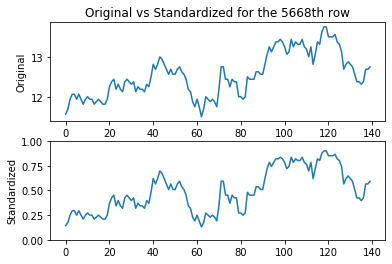

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def standardize(listy):
    zscores = stats.zscore(listy)
    bounded = sigmoid(zscores)
    return bounded

#applies it
dfTrain["StdPast"] = dfTrain["PastList"].apply(standardize)

#graphs it
samp = len(dfTrain) // 2
plt.subplot(2, 1, 1)
plt.title("Original vs Standardized for the " + str(samp) + "th row")
plt.plot(dfTrain["PastList"].iat[samp])
plt.ylabel("Original")
plt.subplot(2, 1, 2, ylim=(0,1))
plt.plot(dfTrain["StdPast"].iat[samp])
plt.ylabel("Standardized")

dfTrain.tail()

Last, the training expected outputs will be a list of the buy and the sell values, the same number of samples as the input values. These have already been scaled to between 0 and 1, so just have to put them into a list

In [29]:
dfTrain["BuySell"] = dfTrain[["ScaleBuy", "ScaleSell"]].values.tolist()
dfTrain.tail()

,Date,Open,ScaleBuy,ScaleSell,PastList,StdPast,BuySell
11472,2018-02-21,95.110001,0.000000,0.764621,"[80.25, 80.339996, 81.339996, 81.059998, 80.57...","[0.2531127700543249, 0.2548880676247579, 0.275...","[0.0, 0.7646214765735133]"
11473,2018-02-22,91.430000,0.097701,0.641599,"[80.339996, 81.339996, 81.059998, 80.57, 81.16...","[0.25208155370982355, 0.27228267142367013, 0.2...","[0.09770066017091866, 0.6415985855550788]"
11474,2018-02-23,92.879997,0.000000,0.708525,"[81.339996, 81.059998, 80.57, 81.1699979999999...","[0.2698117364593272, 0.2640635469121818, 0.254...","[0.0, 0.7085248134673292]"
11475,2018-02-26,92.900002,0.000000,0.722562,"[81.059998, 80.57, 81.16999799999999, 81.11000...","[0.2617008958006135, 0.25185725180314156, 0.26...","[0.0, 0.7225624385276284]"
11476,2018-02-27,93.629997,0.000000,0.755865,"[80.57, 81.16999799999999, 81.110001, 81.07, 8...","[0.24941286829894896, 0.2614695058724651, 0.26...","[0.0, 0.755865057640821]"


Then, we do the exact same procedure to make our testing data

In [30]:
#make a new data frame with    ___these columns _____   skipping until the [last 100]
dfTest = dfPredictor[["Date", "Open", "ScaleBuy", "ScaleSell"]].iloc[-num_test:].copy()

#fill the list with the 140 previous values
pastList = []
for ndx in range(len(dfTest)):
    pastList.append(list(dfPredictor["Open"].iloc[ndx:ndx+140]))
dfTest["PastList"] = pastList

#standardize the past lists to be between 0 and 1
dfTest["StdPast"] = dfTest["PastList"].apply(standardize)

#make the buy/sell into a list as well
dfTest["BuySell"] = dfTest[["ScaleBuy", "ScaleSell"]].values.tolist()


dfTrain.tail()

,Date,Open,ScaleBuy,ScaleSell,PastList,StdPast,BuySell
11472,2018-02-21,95.110001,0.000000,0.764621,"[80.25, 80.339996, 81.339996, 81.059998, 80.57...","[0.2531127700543249, 0.2548880676247579, 0.275...","[0.0, 0.7646214765735133]"
11473,2018-02-22,91.430000,0.097701,0.641599,"[80.339996, 81.339996, 81.059998, 80.57, 81.16...","[0.25208155370982355, 0.27228267142367013, 0.2...","[0.09770066017091866, 0.6415985855550788]"
11474,2018-02-23,92.879997,0.000000,0.708525,"[81.339996, 81.059998, 80.57, 81.1699979999999...","[0.2698117364593272, 0.2640635469121818, 0.254...","[0.0, 0.7085248134673292]"
11475,2018-02-26,92.900002,0.000000,0.722562,"[81.059998, 80.57, 81.16999799999999, 81.11000...","[0.2617008958006135, 0.25185725180314156, 0.26...","[0.0, 0.7225624385276284]"
11476,2018-02-27,93.629997,0.000000,0.755865,"[80.57, 81.16999799999999, 81.110001, 81.07, 8...","[0.24941286829894896, 0.2614695058724651, 0.26...","[0.0, 0.755865057640821]"


### Training and evaluating

Now, to actually pass it through tensorflow, we need to make our data into multidimensional numpy arrays. They are currently pandas Series storing numpy arrays, so we'll just convert it into a nested list which numpy can interpret into a multidimensional array. 

In [31]:
x = dfTrain["StdPast"]
y = dfTrain["BuySell"]
print("Start type of inputs:", type(x), " with shape", x.shape)
print("Start type of outputs:", type(y), " with shape", y.shape)

x = np.array([list(elem) for elem in x])
y = np.array([list(elem) for elem in y])
print("New input shape:", x.shape)
print("New output shape:", y.shape)

Start type of inputs: <class 'pandas.core.series.Series'>  with shape (11337,)
Start type of outputs: <class 'pandas.core.series.Series'>  with shape (11337,)
New input shape: (11337, 140)
New output shape: (11337, 2)


We can now give these to our model to train. Tensorflow uses the 'fit' function to train the model to fit the data better. It runs the data through once for each epoch

In [32]:
model.fit(x, y, epochs=15);

Train on 11337 samples
Epoch 1/15
11337/11337 [==============================] - 6s 505us/sample - loss: 0.0941 - accuracy: 0.5053
Epoch 2/15
11337/11337 [==============================] - 4s 394us/sample - loss: 0.0792 - accuracy: 0.5099
Epoch 3/15
11337/11337 [==============================] - 4s 383us/sample - loss: 0.0779 - accuracy: 0.5180
Epoch 4/15
11337/11337 [==============================] - 4s 368us/sample - loss: 0.0776 - accuracy: 0.5248
Epoch 5/15
11337/11337 [==============================] - 4s 391us/sample - loss: 0.0771 - accuracy: 0.5302
Epoch 6/15
11337/11337 [==============================] - 4s 346us/sample - loss: 0.0769 - accuracy: 0.5330
Epoch 7/15
11337/11337 [==============================] - 4s 321us/sample - loss: 0.0764 - accuracy: 0.5429
Epoch 8/15
11337/11337 [==============================] - 5s 403us/sample - loss: 0.0760 - accuracy: 0.5516
Epoch 9/15
11337/11337 [==============================] - 4s 354us/sample - loss: 0.0751 - accuracy: 0.5609
Epoch

Then, we can standardize our testing data as well

In [33]:
x_test = dfTest["StdPast"]
y_test = dfTest["BuySell"]
x_test = np.array([list(elem) for elem in x_test])
y_test = np.array([list(elem) for elem in y_test])

And finally, evaluate our model to see how well it did

In [34]:
model.evaluate(x_test,  y_test, verbose=2)

400/1 - 0s - loss: 0.0792 - accuracy: 0.5250


[0.08016693651676178, 0.525]

We can get and graph the predictions for this test data as well

In [35]:
predictions = model.predict(x_test)
predictions[:10]

array([[0.42307273, 0.36337954],
       [0.38343304, 0.40033254],
       [0.34779415, 0.43502858],
       [0.35483468, 0.4335565 ],
       [0.3541654 , 0.43081632],
       [0.3187554 , 0.47872153],
       [0.34199083, 0.46836892],
       [0.32463157, 0.49116635],
       [0.29360953, 0.52635396],
       [0.2742493 , 0.547092  ]], dtype=float32)

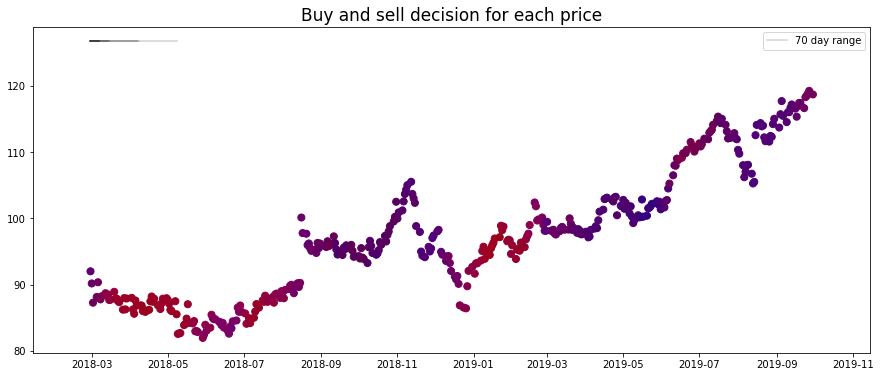

In [36]:
plot_colored_lists(dfTest["Date"], dfTest["Open"], predictions[:, 0], predictions[:, 1])
#plot_colored_lists(dfTest["Date"], dfTest["Open"], dfTest["ScaleBuy"], dfTest["ScaleSell"])

### Results

As you can see, the results of this are not good. The graph shows very few predictions for the points. Since they are mostly wrong, I would assume this is due to our model not being a good model, rather than lack of training. It would seem as though the stock market data is too random to be able to predict the future price, and therefore our program is unable to be trained towards any actual goal.

While dissapointing, this also makes sense. If it had been this easy to create a predictor, then it would be much more common and everyone would simply be using AI to make stock choices. So, in failing to create a good predictor, we successfully showed that the stock market is not easy to predict.

With all that, I still enjoyed the process. I've learned a lot about manipulating data in python, how to use tensorflow, and absolutely love the look of the buy/sell analysis graph.

### Next Steps

There are numerous ways to improve this. The easiest (which I've already actually done, to no avail) is to merely increase the strength of the model. Creating more convolutional layers, and more neural layers allows for more flexibility in the program, so it necessarily must get better. Training more may also help.

Beyond that, including more information would also be useful. Combining both the Walmart and the S&P data would likely provide some overall market trends that could be helpful. Perhaps also having the data further in the past could be helpful to train on.

Headlines could also be useful, which would include some elements of Natural Language Processing (NLP) and sentiment analysis. Or if we would rather go to the actual data, using financial statements would be likely be highly predictive of the market trends. But, it would likely be difficult to obtain a large number of these in usable format, so this would be a challenge.